# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Hello**, welcome to our project "Investigate a dataset" and our dataset in this project is about "Movies" ...
Yeah , I know that we all enjoy watching movies and everyone has its prefered genre . 

### Dataset Description 

> Let's take a deep look about this dataset ...
This data set contains information about 10,000 movies collected from The Movie Database (TMDb):

>1) There are some columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters

>2) The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

>3) The dataset has 10866 rows and 21 columns with total values 228,186 values !!

> Let's take another deep look about the columns: <br>
> **id**  = represents the unique general identifier of each film <br>


> **imdb_id** = represents the unique identifier of each film of Internet Movie Database **(imdb)** <br>

> **popularity** = represents the popularity of the film <br>

> **budget** = represents the amount of money is needed for the film's production <br>

> **revenue** = represents the amount of money is that the film earned <br>

> **original title** = represents the original name of the film <br>

> **homepage** = represents the official website pf the film's show <br>

> **director** = represents the name of the director who made the film <br>

> **tagline** = represents a short sentence tht is used to promote the film's show <br>

> **overview** = represents a brief summary about the film <br>

> **runtime** = represents the duration of the film <br>

> **genres** = represents the type of the film <br>


> production companies = represents the company that produces the film <br>

> **released date** = represents the specific day, month, year when the film became available to the public <br>

> **vote count** = represents the number of votes of the film <br>

> **vote average** = represents the average rating of the film <br>

> **release year** = represents the year when the movie was released <br>

>  The final two columns ending with **“_adj”** show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Question(s) for Analysis
> **First question** : <br>
  As The year 2000 was the beginning of a **new millennium** and the appearance of new technologies : <br>
  *Who is the most successful director between (2000 : 2015) ?*

> **Second question** : What is the most prefered genre over the years ?
  
> **Third question** : Which production companies have produced the most movies?

> **Fourth question** : Is there a correlation between budget and revenue ?

> **Fifth question** : Which film is the most successful ?


In [1]:
#importing libraries to be able to use them in investigating 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

In [2]:
#Here we upload & use the "read_csv" function to be able to use our data set
df = pd.read_csv("tmdb-movies.csv")
#Then we use ".head()" method to know the content of the data set "what the columns and rows talk about"
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

> We use **.shape** method to know the length of dimensions of the data set , <br>
this method returns a tuple that includes 2 values : (**val1**, **val2**)<br>
**val1** =====> represents the value of **rows no.**<br>
**val2** =====> represents the value of **columns no.**

### Data Cleaning
> **ToDo**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

In [4]:
#Here we use ".describe()" to know some statistics information about the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#Here we use ".info()" to know some information about the data set like : the number of non-null values and the data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Here we discovered that many columns has Null values (missing values) so we're going to seperate them into 2 groups :<br>
**Group 1 :** columns which we don't need them to answer questions ===> Delete them <br>
**Group 2 :** columns which we need in our analysis but have null values ===> Get rid of these values or modify them

In [4]:
columns_to_delete = ['id', 'cast', 'homepage', 'tagline', 'imdb_id', 'keywords', 'overview', 'release_date' ]

df = df.drop(columns=columns_to_delete, axis = 1)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


> Here we use **.drop()** method to delete the columns which we don't need (Group1) by assigning them to the variable **columns_to_delete** then pass this variable as argument in the method , <br>
also we wrote **axis = 1** that explains that these labels are in columns as **axis = 0** ====> **rows**

In [5]:
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Here we use the 2 methods : <br>
>1) **isna()** method to check if there is a nan value or not <br>
>2) **.sum()** to get the sum of nan values in column

In [6]:
df.fillna(0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


> Here we use **fillna()** method to fill all the nan values by **0** and we wrote **inplace = True** to modify the main dataFrame <br>
> Then we use **.info()** method to check if there are NANs or they are filled

<a id='eda'></a>
## Exploratory Data Analysis

In [27]:
def grouping_data (df, column_1, column_2):
    grouped_data = df.groupby(column_1)[column_2].sum().sort_values(ascending = False)
    return grouped_data

> Here we make a function is called **grouping_data** to split the dataFrame into specified groups and applying opeations on them then combine the results of the chosen columns **column_1** and **column_2** which we will assign their names from the dataset by using **.groupby()** method <br>

> Also we used another methods like : <br>
>>**.sum()** method to sum all values of the chosen columns <br>
>>**.sort_values()** method to arrange the values , because of the ascendingly arrangement of this method , we wrote **ascending = False** between the () so we can know the arrangement descendingly <br>
>> We assigned all of this to **grouped_data** variable <br>

>> Then we use **return** to return the value of variable

### Research Question 1 <br> (Who is the most successful director between (2000 : 2015) ?)

In [28]:
year_range = df[(df['release_year'] >= 2000) & ((df['release_year'] <= 2015))] 
grouping_data (year_range, 'director', 'revenue')

director
Peter Jackson                                                                                                                      6490593685
Christopher Nolan                                                                                                                  4167548502
David Yates                                                                                                                        4154295625
Michael Bay                                                                                                                        3886938960
Steven Spielberg                                                                                                                   3661994241
J.J. Abrams                                                                                                                        3579169916
Gore Verbinski                                                                                                                     34263622

Text(0.5,1,'Relation between director & revenue')

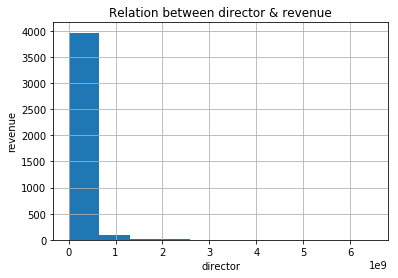

In [21]:
year_range.groupby('director')['revenue'].sum().sort_values(ascending = False).hist()
plt.xlabel("director")
plt.ylabel("revenue")
plt.title("Relation between director & revenue")

> Here we use 2 lines of coding to answer the first question , let's clarify them : 

>**Line 1 :** we called the column **"release_year"** but with conditions and **"&"** which works only when the 2 conditions happened then we assign all of this to the variable **"year_range"**

>**Line 2 :** we used the function , let's clarify what happened: <br> 
1)**.groupby()** method to split the dataFrame into specified groups and applying opeations on them then combine the results of the chosen columns **revenue** and **director** in this case <br>
2)**.sum()** method to sum all values of the chosen columns <br>
3)**.sort_values()** method to arrange the values , because of the ascendingly arrangement of this method , we wrote **ascending = False** between the () so we can know the most successful director by knowing the highest revenue

> From all above , we concluded that the most successful director between 2000 & 2015 is **Peter Jackson**

> Here we can say that **Research Question 1** is **done**

### Research Question 2  (What is the most prefered genre over the years ?)

In [30]:
grouping_data (df, 'genres', 'popularity')

genres
Comedy                                            375.247922
Drama                                             361.127929
Drama|Romance                                     161.440368
Comedy|Romance                                    159.129492
Comedy|Drama                                      134.092834
Horror|Thriller                                   128.083537
Comedy|Drama|Romance                              125.524195
Horror                                             93.533052
Action|Thriller                                    88.709717
Animation|Family                                   79.820459
Action|Adventure|Science Fiction|Thriller          67.541272
Drama|Thriller                                     65.957982
Crime|Drama|Thriller                               59.885993
Adventure|Fantasy|Action                           57.045550
Documentary                                        56.846366
Action|Adventure|Science Fiction                   56.805422
Thriller         

Text(0.5,1,'Relation between genres & their popularity')

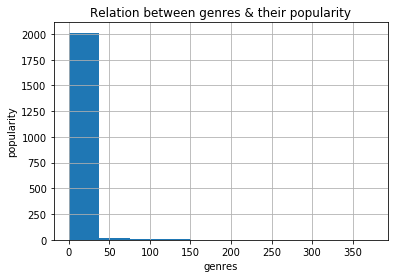

In [22]:
df.groupby('genres')['popularity'].sum().sort_values(ascending = False).hist()
plt.xlabel("genres")
plt.ylabel("popularity")
plt.title("Relation between genres & their popularity")

> Here we know the most prefered genre over the years  which is **Comedy** <br>
> Also we used the same lines of code that we used in the first question but the difference is in the columns as we grouped by the column **genres** with the column **popularity** to know which genre has the most voting so it will be the most prefered <br>
> > Here we can say that **Research Question 2** is **done**

### Research Question 3 (Which production companies have produced the most movies?)

In [11]:
df["production_companies"].value_counts().max()

1030

Text(0.5,1,'Relation between production companies & the no of films they produced')

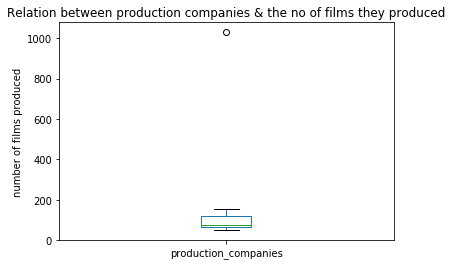

In [23]:
df["production_companies"].value_counts().head(10).plot(kind = 'box')
plt.ylabel("number of films produced")
plt.title("Relation between production companies & the no of films they produced")

> Here we use **.value_counts()** & **.max()** methods with the column **"production_companies"** to know the most common name for the companies which produced most of films which is **Paramount Pictures** company <br>
>> Here we can say that **Research Question 3** is **done**

### Research Question 4 (Is there a correlation between budget and revenue ?)

In [13]:
correlation_columns = df["budget"].corr(df["revenue"])
correlation_columns

0.73490068190761149

Text(0.5,1,'Relation between budget & revenue')

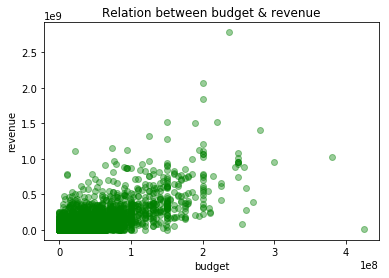

In [24]:
plt.scatter(df["budget"], df["revenue"], alpha = 0.4, color = 'green')
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title("Relation between budget & revenue")

> In the first cell we used **.corr()** method with the column **budget** to get the correlation between it and the column **revenue** and we found it high positive correlation <br>

>> Here we can say that **Research Question 4** is **done**

### Research Question 5  (Which film is the most successful ?)

In [31]:
grouping_data (df, 'original_title', 'popularity')

original_title
Jurassic World                                       32.985763
Mad Max: Fury Road                                   28.419936
Interstellar                                         24.949134
Guardians of the Galaxy                              14.311205
Insurgent                                            13.112507
Captain America: The Winter Soldier                  12.971027
Star Wars                                            12.037933
John Wick                                            11.422751
Star Wars: The Force Awakens                         11.173104
The Hunger Games: Mockingjay - Part 1                10.739009
The Hobbit: The Battle of the Five Armies            10.174599
Avatar                                                9.432768
The Revenant                                          9.421300
Inception                                             9.363643
Furious 7                                             9.335014
Fight Club                              

> Here we used the function , let's clarify what hapenned : <br> 
1)**.groupby()** method to split the dataFrame into specified groups and applying opeations on them then combine the results of the chosen columns **original_title** and **popularity** in this case <br>
2)**.sum()** method to sum all values of the chosen columns <br>
3)**.sort_values()** method to arrange the values , because of the ascendingly arrangement of this method , we wrote **ascending = False** between the () so we can know the most successful director by knowing the highest revenue

> From all above , we concluded that the most successful film is **Jurassic World**

> Here we can say that **Research Question 5** is **done**

<a id='conclusions'></a>
## Conclusions
>Let's sum up all the project:<br>
##### Step 1 :
> Collecting general informations & characteristics about the data set:<br>
> by using some methods like : <br>
>> **.head()** to know the content of the dataset <br>
>> **.describe()** to know some statisitcs infornations about the dataset like " **std, max, min, ...etc** <br>
>> **shape()** to know the dimensions of the dataset **rows = 10866* and **columns = 21** so we can know that the total elements is **228,186** so because of this large number we shoud take the second step <br>
##### Step 2 :
> Wrangling data: <br>
>1) Deleting columns: <br>
>> We delete the unused columns by **.drop()** method so we can reduce data <br>


>2) Finding NaNs (missing values): <br>
>> by using **.info()** method to know the types of elements and total elements in each column then we use **.isna().sum()** to know total NaNs in each column <br>

>3) Modifying NaNs: <br>
>> by using **fillna()** method so we fill them by value **0**

##### Step 3 :
> Answering questions : <br>
>> by using **.groupby()** mainly in this phase to combine specified column values and also by other some methods like **.sort()** to arrange values and **.max()** to get the highest values <br>

> Communication : <br>
> to represents some columns or questions in visualizations using: <br>
>>**.plot()** to draw graphs , **.xlabel()** to give name to x-axis 
>>**.ylabel()** to give name to y-axis 
>>**.title()** to give name to the visual and its purpose

> From all above , we can answer the questions by the following answers : <br>

>====> Who is the most successful director between (2000 : 2015) ? **Peter Jackson** <br>

>.====> What is the most prefered genre over the years ? **Comedy**

>.====> Which production companies have produced the most movies? **Paramount Pictures **

>.====> Is there a correlation between budget and revenue ? **Yes , high positive correlation** , which means by **increasing** the budget , the **revenue** increases 

>.====> Which film is the most successful ? **Jurassic World**

## Here we finished our project , hope it is well , thanks!!

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0